In [120]:
from buildstock_query import BuildStockQuery
import pandas as pd
import os
os.environ['AWS_PROFILE'] = "nrel-aws-resbldg"
os.environ['AWS_DEFAULT_REGION'] = "us-west-2"
## annual table - from SQL
## timeseries tables - from timeseries (8760)

# Query:

In [121]:
my_run = BuildStockQuery(db_name='gashpwh',
                        table_name='icf',
                        workgroup='gashpwh',
                        buildstock_type='resstock')

INFO:buildstock_query.query_core:Loading icf ...
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:buildstock_query.query_core:3 queries cache read from icf_query_cache.pkl.
INFO:buildstock_query.query_core:3 queries cache is updated.
INFO:buildstock_query.main:Getting Success counts...
INFO:buildstock_query.report_query:Checking integrity with ts_tables ...
INFO:buildstock_query.query_core:3 queries cache saved to icf_query_cache.pkl


        Fail  Invalid Success    Sum
upgrade                             
0         42        0   15955  15997
Annual and timeseries tables are verified to have the same number of buildings.
All buildings are verified to have the same number of (8760) timeseries rows.


# Dataframe from Query:

In [122]:
res_df = my_run.get_results_csv()
res_df.columns
res_df.shape

INFO:buildstock_query.main:Making results_csv query ...
c:\Users\pshrest2\Anaconda3\envs\buildstock_query\lib\site-packages\pyathena\pandas\result_set.py:273: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(
c:\Users\pshrest2\Anaconda3\envs\buildstock_query\lib\site-packages\pyathena\pandas\result_set.py:273: DtypeWarning: Columns (10,183,184,185,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,481,482,505,521) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(


(15997, 545)

# Basic filtering example:
df = res_df.filter(regex='report_simulation_output.emissions')

# Dataframe for emissions:

In [124]:
# # Creating a list of columns to keep in the res_df dataframe:
# regex_patterns = ['report_simulation_output.emissions',
# 'build_existing_model.cec_climate_zone',
# 'build_existing_model.geometry_stories',
# 'build_existing_model.heating_fuel',
# 'build_existing_model.hot_water_distribution',
# 'build_existing_model.hot_water_fixtures',
# 'build_existing_model.hvac_heating_type_and_fuel',
# 'build_existing_model.income_recs_2020',
# 'build_existing_model.occupants',
# 'build_existing_model.sample_weight',
# 'build_existing_model.vacancy_status',
# 'build_existing_model.vintage',
# 'build_existing_model.water_heater_efficiency',
# 'build_existing_model.water_heater_fuel',
# 'build_existing_model.water_heater_in_unit',
# 'report_simulation_output.fuel_use',
# 'report_simulation_output.load_hot_water_tank_losses_m_btu',
# 'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_wood_pellets_total_lb',
# 'report_simulation_output.fuel_use_electricity_total_m_btu',
# 'report_simulation_output.fuel_use_fuel_oil_total_m_btu',
# 'report_simulation_output.fuel_use_natural_gas_total_m_btu',
# 'report_simulation_output.fuel_use_natural_gas_total_m_btu',
# 'report_simulation_output.fuel_use_propane_total_m_btu',
# 'report_simulation_output.fuel_use_wood_cord_total_m_btu',
# 'report_simulation_output.fuel_use_wood_pellets_total_m_btu'

# ]

# Creating a list of columns to keep in the res_df dataframe:
regex_patterns = [
    
    # 'report_simulation_output.emissions',
'build_existing_model.cec_climate_zone',
'build_existing_model.geometry_stories',
'build_existing_model.sample_weight',
'build_existing_model.occupants',
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb',

# Totals by fuel type:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_total_lb', # For Fuel Type Electricity Total
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_total_lb', # For Fuel Type Natural Gas Total
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_total_lb', # For Fuel Type Propane Total

# Heating, electricity:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_fans_pumps_lb', # For Heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_heat_pump_backup_fans_pumps_lb', # For Heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_heat_pump_backup_lb', # For Heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_lb', # For Heating by fuel type electricity

# Water Heating, electricity:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_lb', # For water heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_recirc_pump_lb', # For water heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_solar_thermal_pump_lb', # For water heating by fuel type electricity

# Heating, natural gas:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_heating_heat_pump_backup_lb', # For Heating by fuel type natural gas
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_heating_lb', # For Heating by fuel type natural gas

# Water Heating, natural gas:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_hot_water_lb', # For water heating by fuel type natural gas

# Heating, propane:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_heating_heat_pump_backup_lb', # For heating by fuel type Propane
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_heating_lb', # For heating by fuel type Propane

# Water Heating, propane:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_hot_water_lb' # For water heating by fuel type propane

]

filtered_dfs = [res_df.filter(regex=pattern) for pattern in regex_patterns]
df = pd.concat(filtered_dfs, axis=1)
df = df[df['build_existing_model.geometry_stories'].astype(float) <= 5.0]  # Limiting to <= 5 stories high
# Convert the column to numeric (integer)
df['build_existing_model.cec_climate_zone'] = df['build_existing_model.cec_climate_zone'].astype(int)

print(df['build_existing_model.geometry_stories'])
df.shape

building_id
51        2
76        3
130       2
224       2
271       2
         ..
549843    3
549856    1
549858    3
549867    1
549895    2
Name: build_existing_model.geometry_stories, Length: 14173, dtype: object


(14173, 22)

In [125]:
# Outputting the full emissions dataset for easy viewing:
df.to_csv('emissions/df.csv', index=False)
res_df.to_csv('emissions/res_df.csv', index=False)

In [126]:
# Total CO2e number across all homes:
totalCO2e = "{:e}".format(df['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb'].sum())
print("total CO2e, lb = ", totalCO2e)

# Converting to metric tons:
# 1 pound = 0.00045359237 metric tons
print("total MtCO2e = ", (df['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb'].sum())*0.00045359237)

total CO2e, lb =  6.150304e+07
total MtCO2e =  27897.309122422106


# Sanity check plot

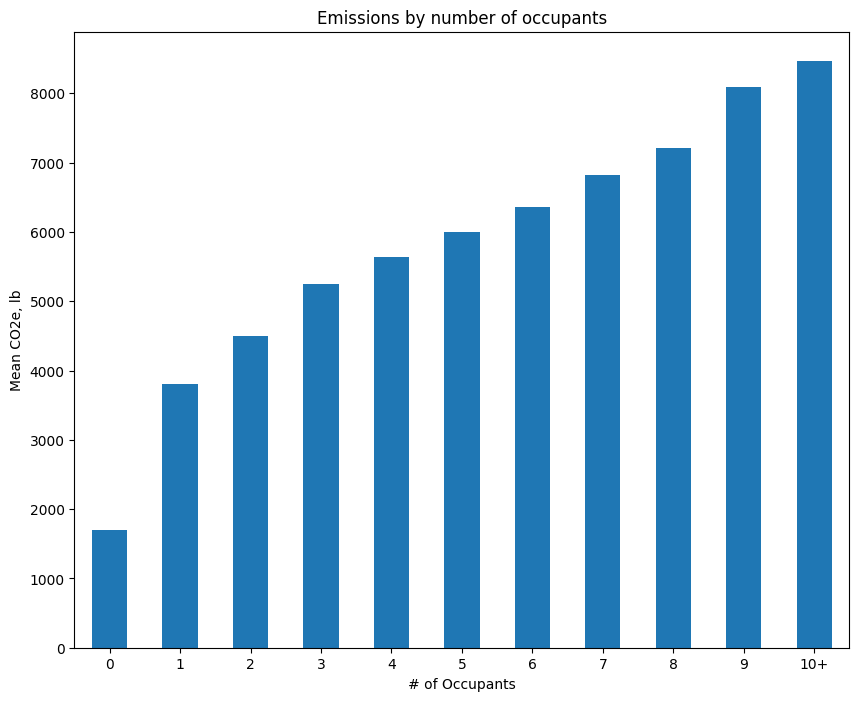

In [127]:
import matplotlib.pyplot as plt

grouped = df.groupby('build_existing_model.occupants')['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb'].mean()

# Sort the data based on the mean values in ascending order
grouped_sorted = grouped.sort_values()

# Generate bar graph for each group
ax = grouped_sorted.plot(kind='bar')
plt.ylabel('Mean CO2e, lb')
plt.xlabel('# of Occupants')
plt.title('Emissions by number of occupants')
ax.set_xticklabels(grouped_sorted.index, rotation=0)
plt.show()

In [128]:
# Creating a 'Totalled' dataframe

df_total = df 
df_total['total'] = (df_total['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_total_lb'] + \
    df_total['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_total_lb'] + \
        df_total['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_total_lb'])


# Actual plots

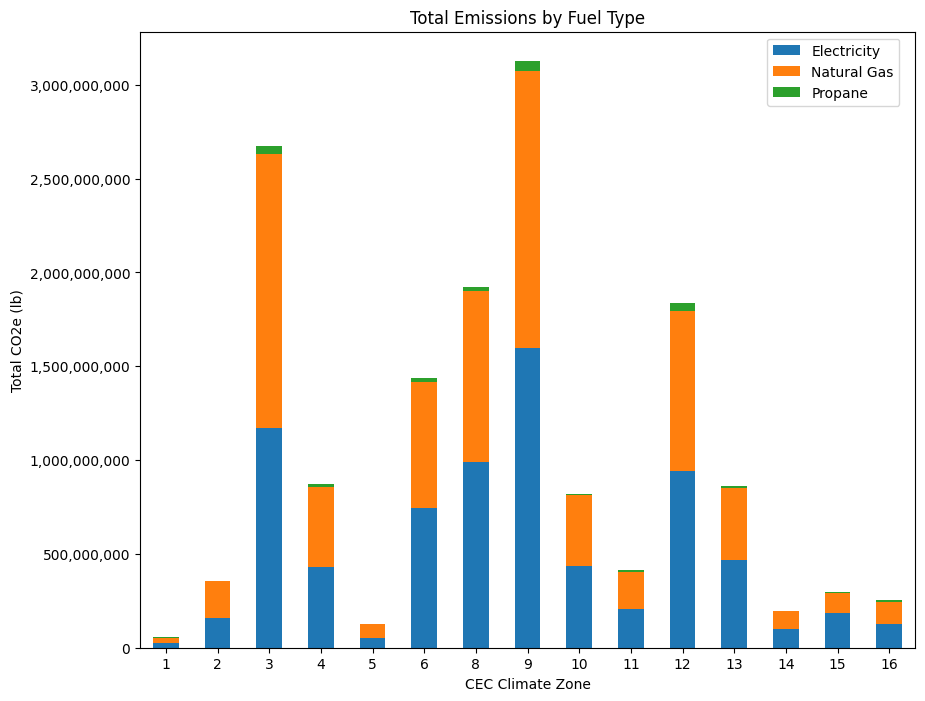

In [129]:


# Total emissions by fuel type in each CEC climate zone:

grouped_by_electricity = df_total.groupby(['build_existing_model.cec_climate_zone'])['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_total_lb'].sum()
grouped_by_natural_gas = df_total.groupby(['build_existing_model.cec_climate_zone'])['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_total_lb'].sum()
grouped_by_propane = df_total.groupby(['build_existing_model.cec_climate_zone'])['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_total_lb'].sum()

grouped_by_all = pd.DataFrame(
    {
        'Electricity': grouped_by_electricity*248,
        'Natural Gas': grouped_by_natural_gas*248,
        'Propane': grouped_by_propane*248
    }
)
grouped_by_all


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the inline backend and desired figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)  # Adjust figsize as needed


ax = grouped_by_all.plot(kind='bar', stacked=True)
plt.xlabel('CEC Climate Zone')
plt.ylabel('Total CO2e (lb)')
plt.title('Total Emissions by Fuel Type')
plt.xticks(rotation=0)

# Move the legend to the right by adjusting bbox_to_anchor
plt.legend(title='', bbox_to_anchor=(0.8, 1), loc='upper left')

# Format y-axis tick labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()


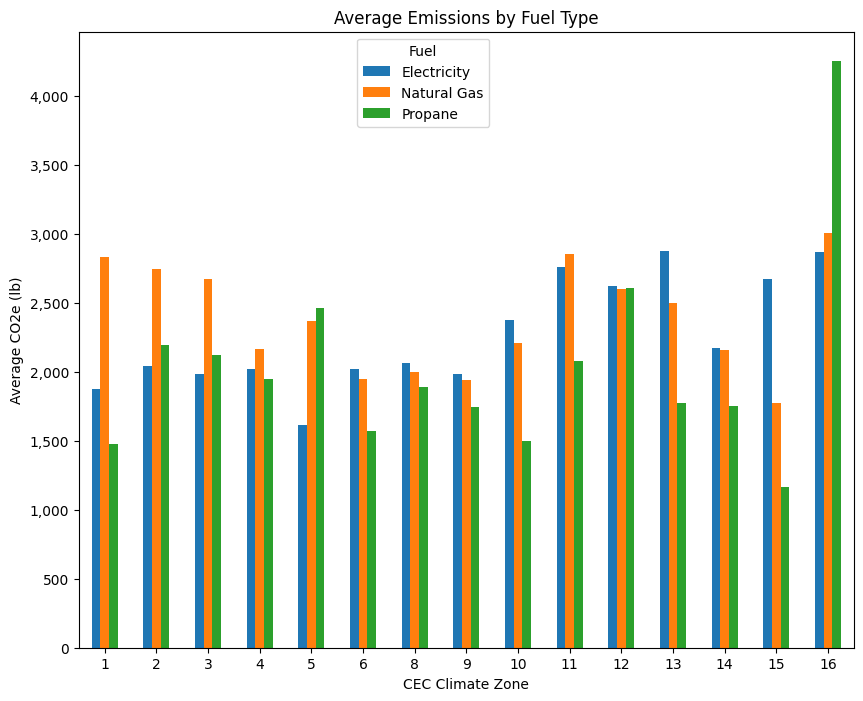

In [130]:
# Average (per dwelling unit) emissions by fuel type in each CEC climate zone:

mask_electricity = df_total['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_total_lb'] != 0
mask_natural_gas = df_total['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_total_lb'] != 0
mask_propane = df_total['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_total_lb'] != 0

df_electricity = df_total[mask_electricity]
df_natural_gas = df_total[mask_natural_gas]
df_propane = df_total[mask_propane]


grouped_by_electricity = df_electricity.groupby(['build_existing_model.cec_climate_zone'])['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_total_lb'].mean()
grouped_by_natural_gas = df_natural_gas.groupby(['build_existing_model.cec_climate_zone'])['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_total_lb'].mean()
grouped_by_propane = df_propane.groupby(['build_existing_model.cec_climate_zone'])['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_total_lb'].mean()

grouped_by_all = pd.DataFrame(
    {
        'Electricity': grouped_by_electricity,
        'Natural Gas': grouped_by_natural_gas,
        'Propane': grouped_by_propane
    }
)
grouped_by_all


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the inline backend and desired figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)  # Adjust figsize as needed


ax = grouped_by_all.plot(kind='bar', stacked=False)
plt.xlabel('CEC Climate Zone')
plt.ylabel('Average CO2e (lb)')
plt.title('Average Emissions by Fuel Type')
plt.xticks(rotation=0)

# Move the legend to the right by adjusting bbox_to_anchor
plt.legend(title='Fuel', bbox_to_anchor=(0.35, 1), loc='upper left')

# Format y-axis tick labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()

In [131]:
# Creating a combined dataframe with columns summing hvac and water heating fuel use emissions:


df_combined = df 
df_combined['electricity_hvac'] = df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_fans_pumps_lb'] + \
    df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_heat_pump_backup_fans_pumps_lb'] + \
        df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_heat_pump_backup_lb'] + \
            df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_lb']

df_combined['natural_gas_hvac'] = df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_heating_heat_pump_backup_lb'] + \
    df_check['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_heating_lb']

df_combined['propane_hvac'] = df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_heating_heat_pump_backup_lb'] + \
    df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_heating_lb']



df_combined['electricity_wh'] = df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_lb'] + \
    df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_recirc_pump_lb'] + \
        df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_solar_thermal_pump_lb']

df_combined['natural_gas_wh'] = df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_hot_water_lb']

df_combined['propane_wh'] = df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_hot_water_lb']



df_combined.to_csv('emissions/df_combined.csv', index=False)

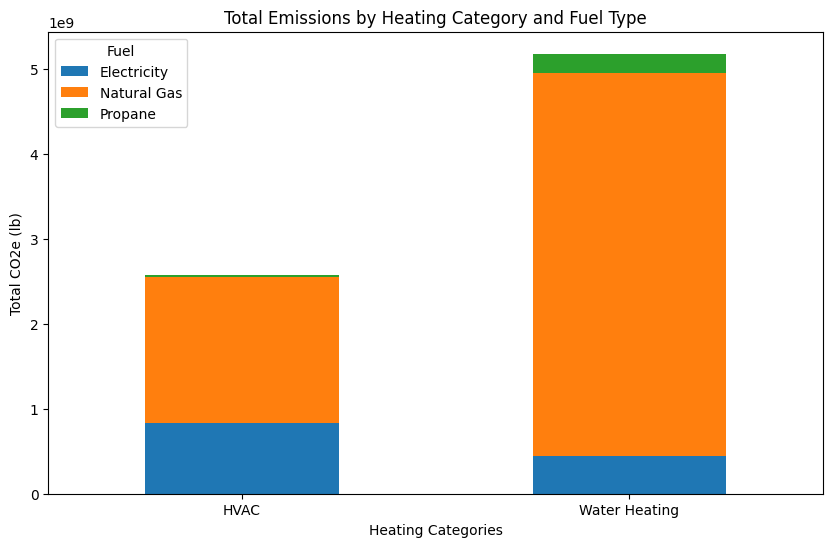

In [132]:
# Total emissions by heating category and fuel type: 

selected_columns = [
    'electricity_hvac',
    'natural_gas_hvac',
    'propane_hvac',
    'electricity_wh',
    'natural_gas_wh',
    'propane_wh'
]

df_subset = df_combined[selected_columns]

electricity_hvac_sum = df_subset['electricity_hvac'].sum()
natural_gas_hvac_sum = df_subset['natural_gas_hvac'].sum()
propane_hvac_sum = df_subset['propane_hvac'].sum()

electricity_wh_sum = df_subset['electricity_wh'].sum()
natural_gas_wh_sum = df_subset['natural_gas_wh'].sum()
propane_wh_sum = df_subset['propane_wh'].sum()

data = {
    'Heating Category': [ 'Electricity', 'Natural Gas', 'Propane' ],
    'HVAC': [electricity_hvac_sum*248, natural_gas_hvac_sum*248, propane_hvac_sum*248],
    'Water Heating': [electricity_wh_sum*248, natural_gas_wh_sum*248, propane_wh_sum*248]
}

df_plot = pd.DataFrame(data)


# Set 'Heating Category' column as the index
df_plot.set_index('Heating Category', inplace=True)

df_plot = df_plot.transpose()
# Plotting
fig, ax = plt.subplots(figsize=(10, 6), dpi = 100)

# Stacked bar chart for HVAC and Water Heating
df_plot[['Electricity', 'Natural Gas', 'Propane']].plot(kind='bar', stacked=True, ax=ax)

# Customize labels and titles
ax.set_ylabel('Total CO2e (lb)')
ax.set_xlabel('Heating Categories')
ax.set_title('Total Emissions by Heating Category and Fuel Type')
ax.legend(title='Fuel')

# Rotate x-axis tick labels to 0 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Show the plot
plt.show()

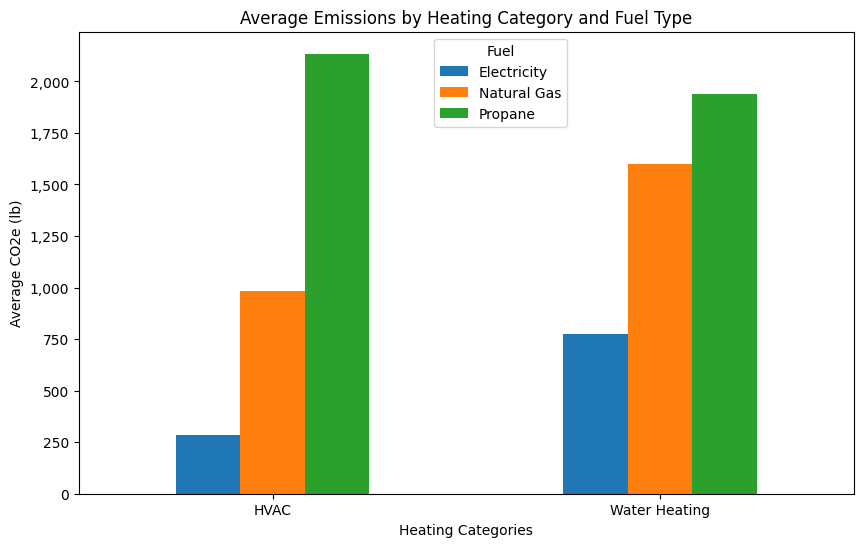

In [133]:
# Average emissions by heating category and fuel type: 

selected_columns = [
    'electricity_hvac',
    'natural_gas_hvac',
    'propane_hvac',
    'electricity_wh',
    'natural_gas_wh',
    'propane_wh'
]

df_subset = df_combined[selected_columns]

electricity_hvac_mask = df_subset['electricity_hvac'] !=0
natural_gas_hvac_mask = df_subset['natural_gas_hvac'] !=0
propane_hvac_mask = df_subset['propane_hvac'] !=0

df_subset_hvac_electricity = df_subset[electricity_hvac_mask]
df_subset_hvac_natural_gas = df_subset[natural_gas_hvac_mask]
df_subset_hvac_propane = df_subset[propane_hvac_mask]


electricity_wh_mask = df_subset['electricity_wh'] !=0
natural_gas_wh_mask = df_subset['natural_gas_wh'] !=0
propane_wh_mask = df_subset['propane_wh'] !=0

df_subset_wh_electricity = df_subset[electricity_wh_mask]
df_subset_wh_natural_gas = df_subset[natural_gas_wh_mask]
df_subset_wh_propane = df_subset[propane_wh_mask]



electricity_hvac_mean = df_subset_hvac_electricity['electricity_hvac'].mean()
natural_gas_hvac_mean = df_subset_hvac_natural_gas['natural_gas_hvac'].mean()
propane_hvac_mean = df_subset_hvac_propane['propane_hvac'].mean()

electricity_wh_mean = df_subset_wh_electricity['electricity_wh'].mean()
natural_gas_wh_mean = df_subset_wh_natural_gas['natural_gas_wh'].mean()
propane_wh_mean = df_subset_wh_propane['propane_wh'].mean()

data = {
    'Heating Category': [ 'Electricity', 'Natural Gas', 'Propane' ],
    'HVAC': [electricity_hvac_mean, natural_gas_hvac_mean, propane_hvac_mean],
    'Water Heating': [electricity_wh_mean, natural_gas_wh_mean, propane_wh_mean]
}

df_plot = pd.DataFrame(data)


# Set 'Heating Category' column as the index
df_plot.set_index('Heating Category', inplace=True)

df_plot = df_plot.transpose()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar chart for HVAC and Water Heating
df_plot[['Electricity', 'Natural Gas', 'Propane']].plot(kind='bar', stacked=False, ax=ax)

# Customize labels and titles
ax.set_ylabel('Average CO2e (lb)')
ax.set_xlabel('Heating Categories')
ax.set_title('Average Emissions by Heating Category and Fuel Type')
ax.legend(title='Fuel', bbox_to_anchor=(0.45, 1), loc='upper left')


# Rotate x-axis tick labels to 0 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Format y-axis tick labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Show the plot
plt.show()

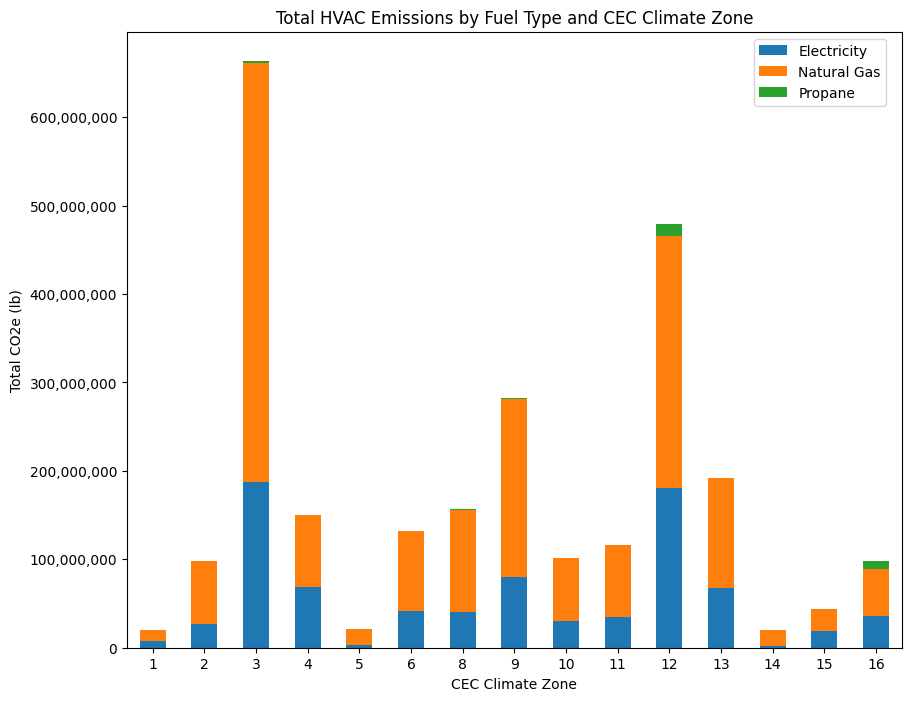

In [134]:
# Total per CEC Climate Zone: HVAC

hvac_grouped_by_electricity = df_combined.groupby(['build_existing_model.cec_climate_zone'])['electricity_hvac'].sum()
hvac_grouped_by_natural_gas = df_combined.groupby(['build_existing_model.cec_climate_zone'])['natural_gas_hvac'].sum()
hvac_grouped_by_propane = df_combined.groupby(['build_existing_model.cec_climate_zone'])['propane_hvac'].sum()



grouped_by_hvac = pd.DataFrame(
    {
        'Electricity': hvac_grouped_by_electricity*248,
        'Natural Gas': hvac_grouped_by_natural_gas*248,
        'Propane': hvac_grouped_by_propane*248
    }
)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the inline backend and desired figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)  # Adjust figsize as needed


ax = grouped_by_hvac.plot(kind='bar', stacked=True)
plt.xlabel('CEC Climate Zone')
plt.ylabel('Total CO2e (lb)')
plt.title('Total HVAC Emissions by Fuel Type and CEC Climate Zone')
plt.xticks(rotation=0)

# Move the legend to the right by adjusting bbox_to_anchor
plt.legend(title='', bbox_to_anchor=(0.8, 1), loc='upper left')

# Format y-axis tick labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()

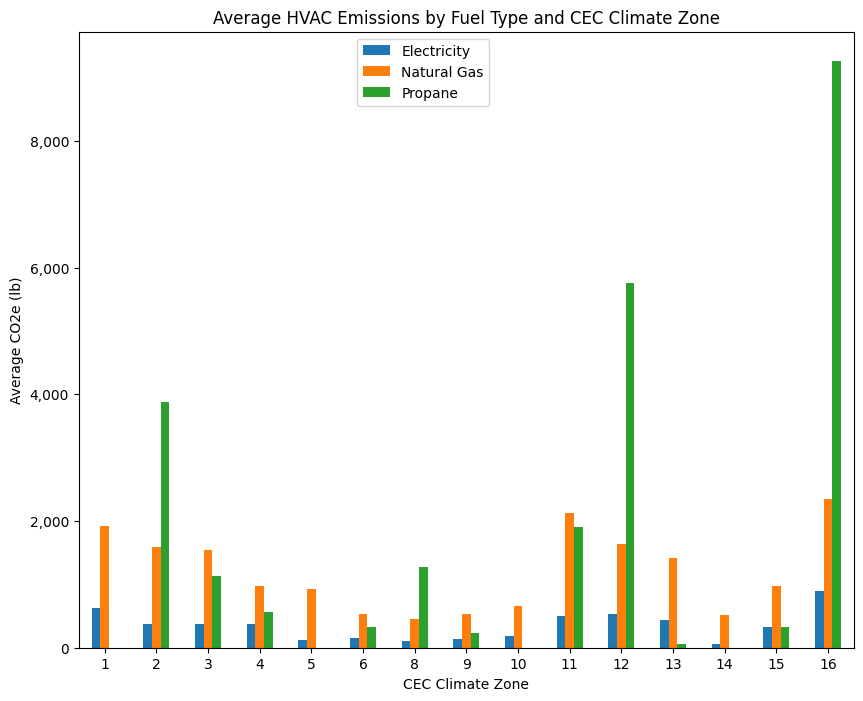

In [135]:
# Average per CEC Climate Zone: HVAC
selected_columns = [
    'build_existing_model.cec_climate_zone',
    'electricity_hvac',
    'natural_gas_hvac',
    'propane_hvac',
    'electricity_wh',
    'natural_gas_wh',
    'propane_wh'
]

df_subset = df_combined[selected_columns]

electricity_hvac_mask = df_subset['electricity_hvac'] !=0
natural_gas_hvac_mask = df_subset['natural_gas_hvac'] !=0
propane_hvac_mask = df_subset['propane_hvac'] !=0

df_subset_hvac_electricity = df_subset[electricity_hvac_mask]
df_subset_hvac_natural_gas = df_subset[natural_gas_hvac_mask]
df_subset_hvac_propane = df_subset[propane_hvac_mask]

hvac_grouped_by_electricity = df_subset_hvac_electricity.groupby(['build_existing_model.cec_climate_zone'])['electricity_hvac'].mean()
hvac_grouped_by_natural_gas = df_subset_hvac_natural_gas.groupby(['build_existing_model.cec_climate_zone'])['natural_gas_hvac'].mean()
hvac_grouped_by_propane = df_subset_hvac_propane.groupby(['build_existing_model.cec_climate_zone'])['propane_hvac'].mean()



grouped_by_hvac = pd.DataFrame(
    {
        'Electricity': hvac_grouped_by_electricity,
        'Natural Gas': hvac_grouped_by_natural_gas,
        'Propane': hvac_grouped_by_propane
    }
)


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the inline backend and desired figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)  # Adjust figsize as needed


ax = grouped_by_hvac.plot(kind='bar', stacked=False)
plt.xlabel('CEC Climate Zone')
plt.ylabel('Average CO2e (lb)')
plt.title('Average HVAC Emissions by Fuel Type and CEC Climate Zone')
plt.xticks(rotation=0)

# Move the legend to the right by adjusting bbox_to_anchor
plt.legend(title='', bbox_to_anchor=(0.35, 1), loc='upper left')

# Format y-axis tick labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()

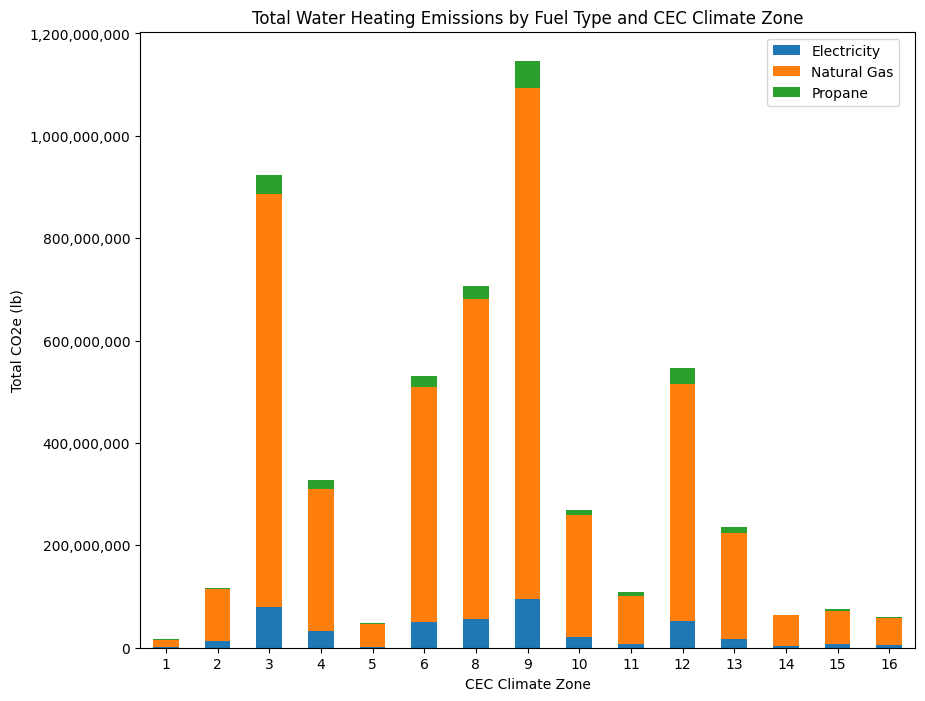

In [136]:
# Total per CEC Climate Zone: Water Heating

wh_grouped_by_electricity = df_combined.groupby(['build_existing_model.cec_climate_zone'])['electricity_wh'].sum()
wh_grouped_by_natural_gas = df_combined.groupby(['build_existing_model.cec_climate_zone'])['natural_gas_wh'].sum()
wh_grouped_by_propane = df_combined.groupby(['build_existing_model.cec_climate_zone'])['propane_wh'].sum()

grouped_by_wh = pd.DataFrame(
    {
        'Electricity': wh_grouped_by_electricity*248,
        'Natural Gas': wh_grouped_by_natural_gas*248,
        'Propane': wh_grouped_by_propane*248
    }
)


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the inline backend and desired figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)  # Adjust figsize as needed


ax = grouped_by_wh.plot(kind='bar', stacked=True)
plt.xlabel('CEC Climate Zone')
plt.ylabel('Total CO2e (lb)')
plt.title('Total Water Heating Emissions by Fuel Type and CEC Climate Zone')
plt.xticks(rotation=0)

# Move the legend to the right by adjusting bbox_to_anchor
plt.legend(title='', bbox_to_anchor=(0.8, 1), loc='upper left')

# Format y-axis tick labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()


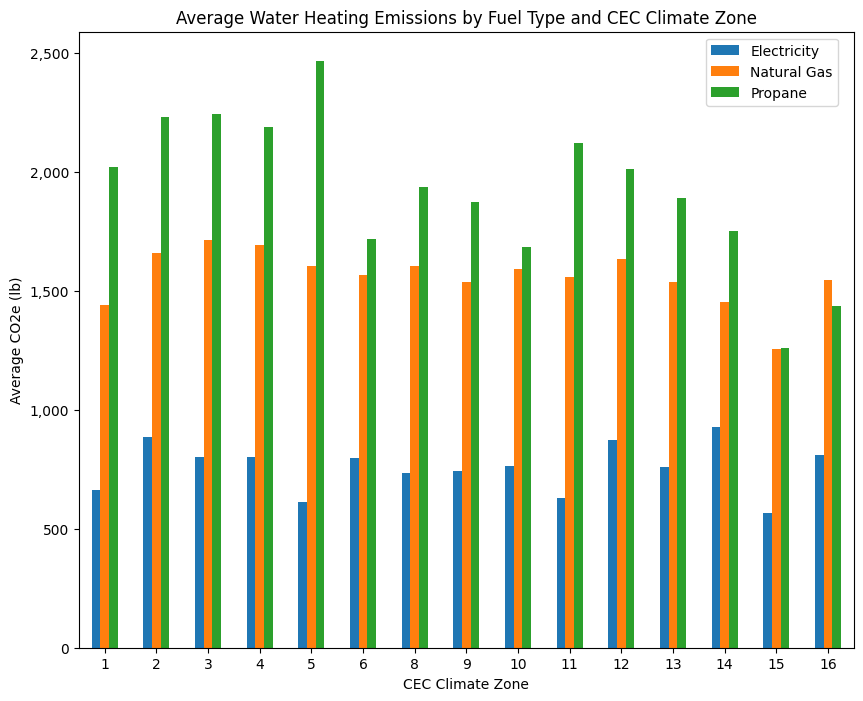

In [137]:
# Average per CEC Climate Zone: Water Heating

selected_columns = [
    'build_existing_model.cec_climate_zone',
    'electricity_hvac',
    'natural_gas_hvac',
    'propane_hvac',
    'electricity_wh',
    'natural_gas_wh',
    'propane_wh'
]

df_subset = df_combined[selected_columns]

electricity_wh_mask = df_subset['electricity_wh'] !=0
natural_gas_wh_mask = df_subset['natural_gas_wh'] !=0
propane_wh_mask = df_subset['propane_wh'] !=0

df_subset_wh_electricity = df_subset[electricity_wh_mask]
df_subset_wh_natural_gas = df_subset[natural_gas_wh_mask]
df_subset_wh_propane = df_subset[propane_wh_mask]

wh_grouped_by_electricity = df_subset_wh_electricity.groupby(['build_existing_model.cec_climate_zone'])['electricity_wh'].mean()
wh_grouped_by_natural_gas = df_subset_wh_natural_gas.groupby(['build_existing_model.cec_climate_zone'])['natural_gas_wh'].mean()
wh_grouped_by_propane = df_subset_wh_propane.groupby(['build_existing_model.cec_climate_zone'])['propane_wh'].mean()


grouped_by_wh = pd.DataFrame(
    {
        'Electricity': wh_grouped_by_electricity,
        'Natural Gas': wh_grouped_by_natural_gas,
        'Propane': wh_grouped_by_propane
    }
)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the inline backend and desired figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)  # Adjust figsize as needed


ax = grouped_by_wh.plot(kind='bar', stacked=False)
plt.xlabel('CEC Climate Zone')
plt.ylabel('Average CO2e (lb)')
plt.title('Average Water Heating Emissions by Fuel Type and CEC Climate Zone')
plt.xticks(rotation=0)

# Move the legend to the right by adjusting bbox_to_anchor
plt.legend(title='', bbox_to_anchor=(0.8, 1), loc='upper left')

# Format y-axis tick labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()